In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("./Datasets/stations_cleaned.csv")

In [23]:
df.sample(5)

,station_code,monitoring_location,state_name,temp_min,temp_max,do_min,do_max,ph_min,ph_max,conductivity_min,...,fecal_coliform_min,fecal_coliform_max,total_coliform_min,total_coliform_max,nitrate_minmissing,nitrate_maxmissing,fecal_coliform_minmissing,fecal_coliform_maxmissing,total_coliform_minmissing,total_coliform_maxmissing
460,1369,"RIVER KSHIPRA AT RAMGHAT AT UJJAIN, M.P.",MADHYA PRADESH,1.419607,27.0,1.974081,2.174752,1.128774,1.158782,5.958425,...,5.860786,7.378384,7.378384,7.378384,0,0,0,0,0,0
1184,1035,"RIVER KARO AT LOHOJIMI U/S, JHARKAND",JHARKHAND,1.223156,26.0,2.163323,2.186051,1.107951,1.144244,0.741937,...,3.332205,5.351858,5.141664,7.170888,1,1,1,1,1,1
278,10122,"RIVER GANGA AT TRIVENI GHAT, PATNA",BIHAR,1.310506,33.0,1.960095,2.282382,1.132735,1.175792,5.451038,...,7.741099,10.463132,8.101981,11.429555,0,0,0,0,0,0
381,5764,RIVER GIRI B/C WITH ASHWANI KHAD U/S OF WSS YA...,HIMACHAL PRADESH,1.080418,8.0,2.041220,2.351375,1.147962,1.172487,5.351858,...,1.098612,3.258097,3.218876,6.293419,0,0,0,0,0,0
1427,5592,RIVER TUNGABHADRA AT AIRANI,KARNATAKA,1.466077,30.0,2.054124,2.128232,1.147962,1.175792,4.762174,...,2.890372,4.709530,5.398163,7.378384,0,0,0,0,0,0


In [ ]:
df['temp'] = df[['temp_min', 'temp_max']].mean(axis=1)
df['do'] = df[['do_min', 'do_max']].mean(axis=1)
df['ph'] = df[['ph_min', 'ph_max']].mean(axis=1)
df['conductivity'] = df[['conductivity_min', 'conductivity_max']].mean(axis=1)
df['bod'] = df[['bod_min', 'bod_max']].mean(axis=1)
df['fecal_coliform'] = df[['fecal_coliform_min', 'fecal_coliform_max']].mean(axis=1)

In [ ]:
# df['temp'] = df[['temp_min', 'temp_max']].median(axis=1)
# df['do'] = df[['do_min', 'do_max']].median(axis=1)
# df['ph'] = df[['ph_min', 'ph_max']].median(axis=1)
# df['conductivity'] = df[['conductivity_min', 'conductivity_max']].median(axis=1)
# df['bod'] = df[['bod_min', 'bod_max']].median(axis=1)
# df['fecal_coliform'] = df[['fecal_coliform_min', 'fecal_coliform_max']].median(axis=1)

In [26]:
WHO_RANGES = {
    'conductivity': (200, 400),      # µS/cm
    'ph': (6.5, 8.5),
    'do': (5, 14.6),                 # mg/L
    'temp': (0, 35),                 # approximate safe range (no strict WHO)
    'bod': (0, 10),                  # NGT limit, used here
    'fecal_coliform': (0, 100)       # MPN/100ml typical safe value
}

In [27]:
df['ph'] = df['ph'] * 7     # since values ~1 → expected 6–8 range
df['do'] = df['do'] * 5     # since values ~2 → expected 5–10 mg/L
df['bod'] = df['bod'] * 10  # since values ~0.5 → expected 5–10 mg/L
df['conductivity'] = df['conductivity'] * 100  # since values ~1–10 → expected 200–400 µS/cm
df['fecal_coliform'] = 10 ** df['fecal_coliform']  # if log-transformed (check range)

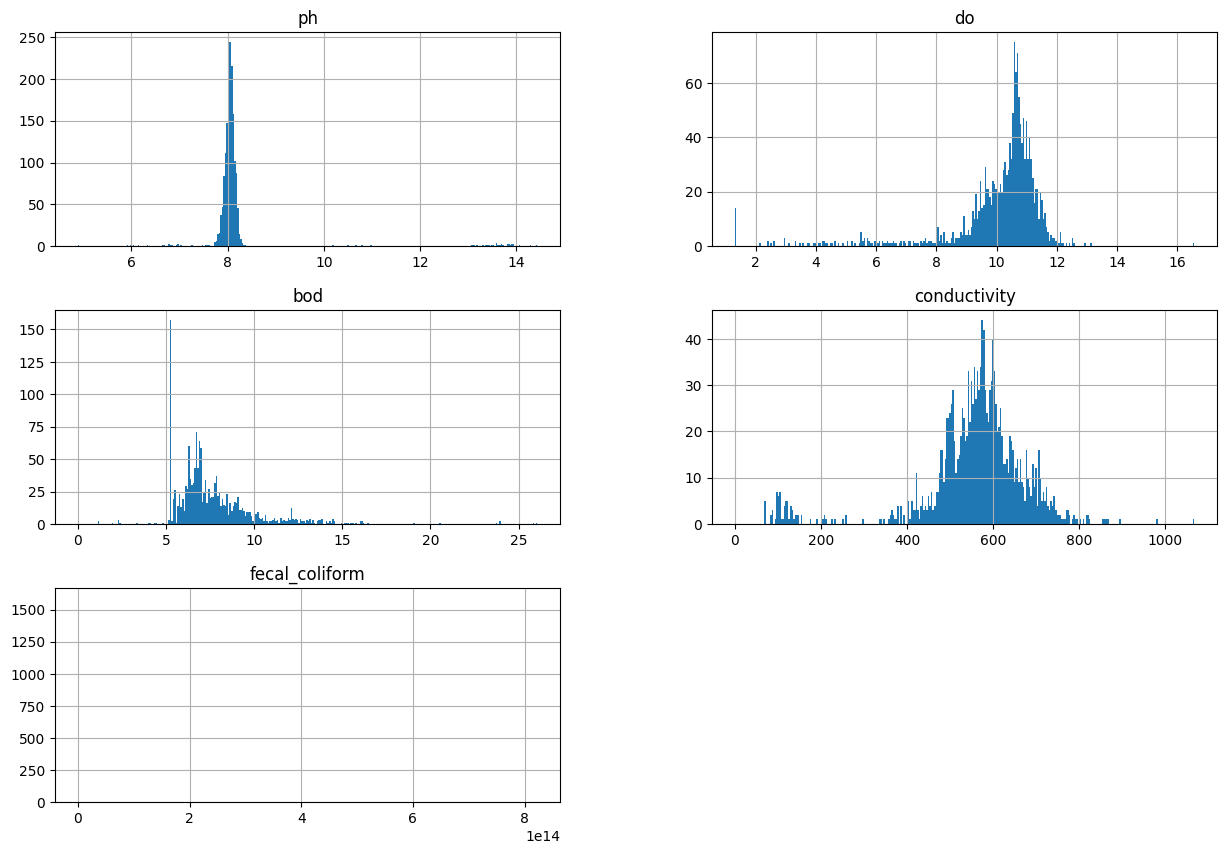

In [28]:
import matplotlib.pyplot as plt
df[['ph', 'do', 'bod', 'conductivity', 'fecal_coliform']].hist(bins=300, figsize=(15,10))
plt.show()

In [29]:
def classify_safe(row):
    if not (WHO_RANGES['conductivity'][0] <= row['conductivity'] <= WHO_RANGES['conductivity'][1]):
        return 0
    if not (WHO_RANGES['ph'][0] <= row['ph'] <= WHO_RANGES['ph'][1]):
        return 0
    if not (WHO_RANGES['do'][0] <= row['do'] <= WHO_RANGES['do'][1]):
        return 0
    if row['bod'] > WHO_RANGES['bod'][1]:
        return 0
    if row['fecal_coliform'] > WHO_RANGES['fecal_coliform'][1]:
        return 0
    return 1  # Safe

df['safe_status'] = df.apply(classify_safe, axis=1)

In [30]:
df[df['safe_status'] == 1]

,station_code,monitoring_location,state_name,temp_min,temp_max,do_min,do_max,ph_min,ph_max,conductivity_min,...,fecal_coliform_maxmissing,total_coliform_minmissing,total_coliform_maxmissing,temp,do,ph,conductivity,bod,fecal_coliform,safe_status
206,5451,RIVER MANDAKINI AT KEDARNATH,UTTARAKHAND,1.223156,10.0,2.517696,2.517696,1.162283,1.162283,3.931826,...,0,0,0,5.611578,12.588482,8.135982,393.182563,5.265890,12.549092,1
207,5452,RIVER ALAKNANDA AT BADRINATH,UTTARAKHAND,1.301321,13.5,2.501436,2.501436,1.136632,1.136632,3.784190,...,0,0,0,7.400661,12.507180,7.956425,378.418963,5.265890,12.549092,1
317,1492,RIVER YAMUNA AT YAMUNOTRI,UTTARAKHAND,0.959135,4.0,2.501436,2.501436,1.155229,1.155229,3.465736,...,0,0,0,2.479567,12.507180,8.086606,346.573590,5.265890,12.549092,1
781,3372,RIVER RILANG AT MAWKYRWAT,MEGHALAYA,1.310506,19.0,2.116256,2.282382,1.116493,1.132735,3.433987,...,0,0,0,10.155253,10.996595,7.872296,356.143333,5.407935,12.549092,1
783,3378,RIVER MYNTANG AT MYNSO MEGHALAYA,Unknown,1.223156,20.0,2.091864,2.272126,1.112259,1.128774,3.610918,...,0,0,0,10.611578,10.909975,7.843616,373.053276,5.884902,33.285970,1
836,4307,RIVER WAHREW AT MAJAI MEGHALAYA,Unknown,1.358505,19.0,2.151762,2.251292,1.120655,1.136632,3.526361,...,0,0,0,10.179252,11.007635,7.900505,380.194898,5.777238,12.549092,1
837,4308,RIVER UMNGI AT JAKREM MEGHALAYA,Unknown,1.194706,20.0,2.091864,2.251292,1.116493,1.132735,3.433987,...,0,0,0,10.597353,10.857890,7.872296,363.131430,5.777238,22.595664,1
838,4309,RIVER UMNGI AT UMPUNG MEGHALAYA,Unknown,1.327761,21.0,2.104134,2.261763,1.124748,1.155229,3.663562,...,0,0,0,11.163881,10.914743,7.979922,384.445667,6.081782,33.285970,1
839,4310,RIVER RWIANG AT RWIANG MEGHALAYA,Unknown,1.314072,21.0,2.066863,2.240710,1.112259,1.136632,3.555348,...,0,0,0,11.157036,10.768931,7.871118,377.216605,6.081782,98.739750,1
853,4322,RIVER THLU UMWI AT THLU UMWI MEGHALAYA,Unknown,1.223156,21.0,2.041220,2.186051,0.959135,1.020634,3.610918,...,0,0,0,11.111578,10.568179,6.929189,384.422768,6.613149,50.187862,1
